In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../data/transformed/after_preprocess.csv')
df.head()

,team,opponent,venue,date,time,round,day,result,gf,ga,...,aerial duels won,aerial duels lost,season,b365h,b365d,b365a,over2.5,under2.5,points,points_before_match
0,1,19,1,2024-08-25,16,2,6,3,2.0,0.0,...,6.0,8.0,2024-2025,1.27,5.75,11.0,1.36,3.20,6,3
1,1,22,1,2024-09-14,15,4,5,0,0.0,1.0,...,21.0,12.0,2024-2025,1.22,6.50,12.0,1.44,2.75,9,9
2,1,16,1,2024-09-21,15,5,5,3,3.0,0.0,...,9.0,6.0,2024-2025,1.30,6.25,9.0,1.36,3.20,12,9
3,1,5,1,2024-10-20,16,8,6,3,2.0,1.0,...,6.0,10.0,2024-2025,1.62,4.10,5.0,1.40,3.00,21,18
4,1,7,1,2024-11-02,15,10,5,3,2.0,1.0,...,10.0,8.0,2024-2025,1.40,5.00,7.5,1.40,3.00,25,22


In [16]:
df['month'] = pd.to_datetime(df['date']).dt.month
cols = ['date', 'month'] + [col for col in df if col not in ['date', 'month']]
df = df[cols]
df.head()

,date,month,team,opponent,venue,time,round,day,result,gf,...,aerial duels won,aerial duels lost,season,b365h,b365d,b365a,over2.5,under2.5,points,points_before_match
0,2024-08-25,8,1,19,1,16,2,6,3,2.0,...,6.0,8.0,2024-2025,1.27,5.75,11.0,1.36,3.20,6,3
1,2024-09-14,9,1,22,1,15,4,5,0,0.0,...,21.0,12.0,2024-2025,1.22,6.50,12.0,1.44,2.75,9,9
2,2024-09-21,9,1,16,1,15,5,5,3,3.0,...,9.0,6.0,2024-2025,1.30,6.25,9.0,1.36,3.20,12,9
3,2024-10-20,10,1,5,1,16,8,6,3,2.0,...,6.0,10.0,2024-2025,1.62,4.10,5.0,1.40,3.00,21,18
4,2024-11-02,11,1,7,1,15,10,5,3,2.0,...,10.0,8.0,2024-2025,1.40,5.00,7.5,1.40,3.00,25,22


In [17]:
column_not_need_form = ['team', 'opponent', 'venue', 'attendance', 'formation', 'oop formation', 'referee', 'captain', 'points',
                    'points_before_match', 'season', 'round', 'date', 'day', 'time', 'month', 'b365h', 'b365d', 'b365a', 'over2.5', 'under2.5']

In [18]:
# create form_feature for each feature not in column_not_need_form from the previous 5 games
def get_form(team, date):
    team_games = df[(df['team'] == team) & (df['date'] <= date)].sort_values(by='date', ascending=False)
    features = [col for col in team_games.columns if col not in column_not_need_form]
    cur_game_index = len(team_games) 
    form_stats = {}
    if cur_game_index == 1:
        team_games = team_games.iloc[0]

    elif 1 < cur_game_index < 5:
        team_games = team_games.iloc[1:]

    else:
        team_games = team_games.iloc[1:5]

    for feature in features:
        form_stats[feature + '_form'] = team_games[feature].mean()
    return form_stats

# get_form(2, '2017-08-11')
    
def add_form_features(df):
    form_features = []
    for i, row in df.iterrows():
        form_features.append(get_form(row['team'], row['date']))
    form_features = pd.DataFrame(form_features)
    df = df.reset_index(drop=True)
    return pd.concat([df, form_features], axis=1)

In [19]:
add_form_features(df)

,date,month,team,opponent,venue,time,round,day,result,gf,...,performance off_form,performance crs_form,performance int_form,performance tklw_form,performance pkwon_form,performance pkcon_form,performance og_form,performance recov_form,aerial duels won_form,aerial duels lost_form
0,2024-08-25,8,1,19,1,16,2,6,3,2.0,...,4.00,20.50,7.75,11.00,0.00,0.0,0.0,48.00,11.25,7.00
1,2024-09-14,9,1,22,1,15,4,5,0,0.0,...,1.50,17.25,7.50,11.00,0.00,0.0,0.0,48.25,12.75,7.00
2,2024-09-21,9,1,16,1,15,5,5,3,3.0,...,0.75,15.75,8.25,9.75,0.00,0.0,0.0,46.75,14.50,9.00
3,2024-10-20,10,1,5,1,16,8,6,3,2.0,...,0.50,16.00,9.25,9.25,0.25,0.0,0.0,44.75,16.75,8.75
4,2024-11-02,11,1,7,1,15,10,5,3,2.0,...,2.00,16.25,7.75,10.50,0.50,0.0,0.0,39.75,13.50,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,2018-03-03,3,24,17,0,15,29,5,0,0.0,...,2.75,17.25,14.00,8.00,0.00,0.0,0.0,57.50,22.50,21.50
5516,2018-03-17,3,24,16,0,15,31,5,0,1.0,...,3.00,23.50,11.00,9.25,0.00,0.0,0.0,57.75,26.75,25.00
5517,2018-04-15,4,24,3,0,16,34,6,3,1.0,...,2.50,22.75,9.75,10.50,0.00,0.0,0.0,57.25,21.25,23.50
5518,2018-04-28,4,24,8,0,15,36,5,3,1.0,...,2.50,23.50,11.00,8.75,0.00,0.0,0.0,56.25,19.75,18.75


In [7]:
# df.to_csv('./data/after_getform.csv')

In [ ]:
data = pd.read_csv('../data/processed/after_getform_4.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/after_getform_4.csv'

In [9]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
important_col = ['gf', 'ga', 'result']
data.drop(columns=[col for col in data.columns if 'form' not in col and col not in column_not_need_form and col not in important_col], inplace=True)
data.head()

,date,month,team,opponent,venue,time,round,day,result,gf,...,performance off_form,performance crs_form,performance int_form,performance tklw_form,performance pkwon_form,performance pkcon_form,performance og_form,performance recov_form,aerial duels won_form,aerial duels lost_form
0,2024-08-25,8,1,19,1,16,2,6,3,2.0,...,4.00,20.50,7.75,11.00,0.00,0.0,0.0,48.00,11.25,7.00
1,2024-09-14,9,1,22,1,15,4,5,0,0.0,...,1.50,17.25,7.50,11.00,0.00,0.0,0.0,48.25,12.75,7.00
2,2024-09-21,9,1,16,1,15,5,5,3,3.0,...,0.75,15.75,8.25,9.75,0.00,0.0,0.0,46.75,14.50,9.00
3,2024-10-20,10,1,5,1,16,8,6,3,2.0,...,0.50,16.00,9.25,9.25,0.25,0.0,0.0,44.75,16.75,8.75
4,2024-11-02,11,1,7,1,15,10,5,3,2.0,...,2.00,16.25,7.75,10.50,0.50,0.0,0.0,39.75,13.50,11.25


In [11]:
data['season'] = data['season'].apply(lambda x: x.split('-')[0])
data['season'] = data['season'].astype(int)
data['season'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017])

In [12]:
data.columns

Index(['date', 'month', 'team', 'opponent', 'venue', 'time', 'round', 'day',
       'result', 'gf',
       ...
       'performance off_form', 'performance crs_form', 'performance int_form',
       'performance tklw_form', 'performance pkwon_form',
       'performance pkcon_form', 'performance og_form',
       'performance recov_form', 'aerial duels won_form',
       'aerial duels lost_form'],
      dtype='object', length=156)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
train_set = data[data['date'] < '2022-01-01']
test_set = data[data['date'] >= '2022-01-01']

In [15]:
predictors = [col for col in data.columns if col not in ['gf', 'ga', 'date', 'result', 'points']]
rf.fit(train_set[predictors], train_set['result']) 

RandomForestClassifier(random_state=42)

In [16]:
preds = rf.predict(test_set[predictors])

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_set['result'], preds)
acc

0.5510879848628193

In [18]:
'''
acc if get form by last 3 games: 0.543519394512772
acc if get form by last 4 games: 0.5510879848628193
acc if get form by last 5 games: 0.5421002838221382
acc if get form by last 6 games: 0.5501419110690634
acc if get form by last 7 games: 0.5392620624408704
=> use 4 games
'''

'\nacc if get form by last 3 games: 0.543519394512772\nacc if get form by last 4 games: 0.5510879848628193\nacc if get form by last 5 games: 0.5421002838221382\nacc if get form by last 6 games: 0.5501419110690634\nacc if get form by last 7 games: 0.5392620624408704\n=> use 4 games\n'

In [19]:
match = test_set.iloc[51]
match['result']

3

In [20]:
rf.predict([match[predictors]])

c:\Users\admin\anaconda3\envs\ai_learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

                    Feature  Importance
2                  opponent    0.028919
18          performance crs    0.022794
27                    b365d    0.017449
8                   captain    0.015964
1                      team    0.014873
..                      ...         ...
43         standard pk_form    0.001308
98       gca types def_form    0.000841
147     performance og_form    0.000807
138  performance 2crdy_form    0.000630
14        performance 2crdy    0.000293

[151 rows x 2 columns]


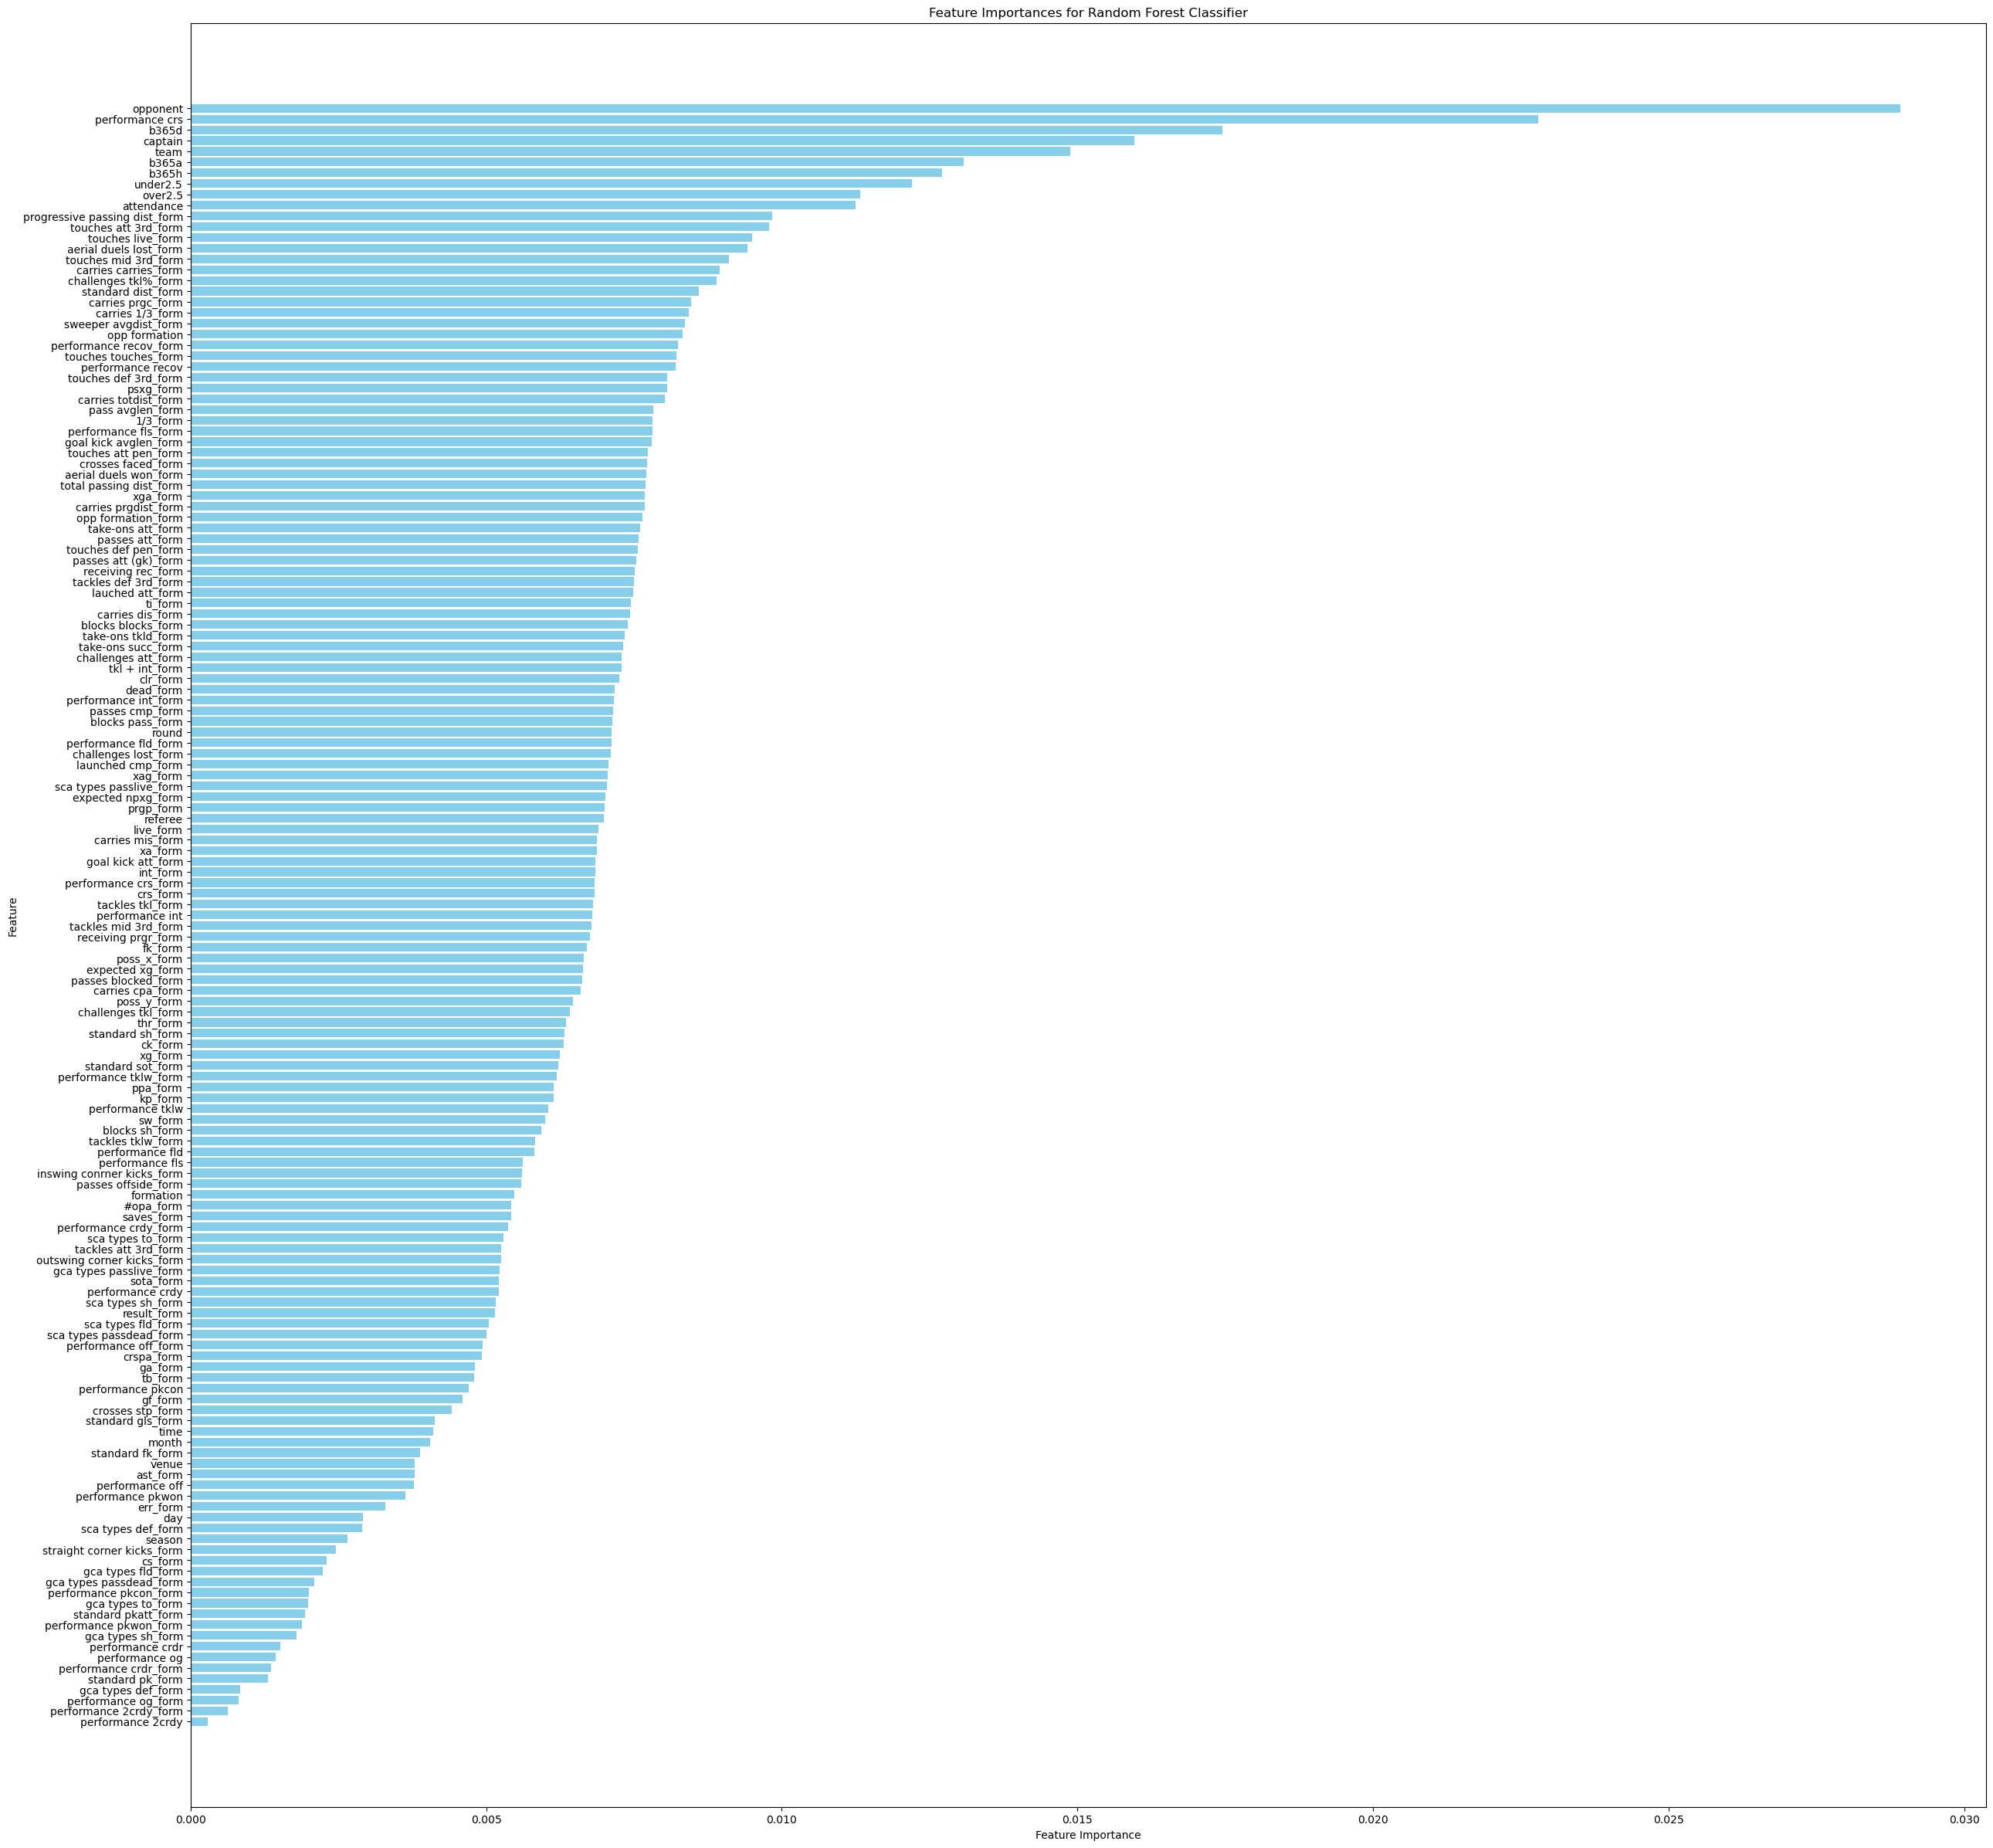

In [21]:
feature_importances = rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(30, 30))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
train_set = data[data['date'] < '2021-08-01']  
valid_set = data[(data['date'] >= '2021-08-01') & (data['date'] < '2022-08-01')]  
test_set = data[data['date'] >= '2022-08-01']

In [24]:
predictors = [col for col in data.columns if col not in ['gf', 'ga', 'date', 'result', 'points']]

In [25]:
# Hyperparameters
n_estimators_list = [50, 100, 200]
max_depth_list = [None, 10, 20]
best_model = None
best_acc = 0

In [26]:
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        rf.fit(train_set[predictors], train_set['result'])
        val_preds = rf.predict(valid_set[predictors])
        acc = accuracy_score(valid_set['result'], val_preds)
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Validation Accuracy: {acc}")
        
        if acc > best_acc:
            best_acc = acc
            best_model = rf

print("Best Validation Accuracy:", best_acc)

n_estimators: 50, max_depth: None, Validation Accuracy: 0.5407894736842105
n_estimators: 50, max_depth: 10, Validation Accuracy: 0.5657894736842105
n_estimators: 50, max_depth: 20, Validation Accuracy: 0.5631578947368421
n_estimators: 100, max_depth: None, Validation Accuracy: 0.5565789473684211
n_estimators: 100, max_depth: 10, Validation Accuracy: 0.5631578947368421
n_estimators: 100, max_depth: 20, Validation Accuracy: 0.5605263157894737
n_estimators: 200, max_depth: None, Validation Accuracy: 0.5815789473684211
n_estimators: 200, max_depth: 10, Validation Accuracy: 0.5710526315789474
n_estimators: 200, max_depth: 20, Validation Accuracy: 0.5723684210526315
Best Validation Accuracy: 0.5815789473684211


In [27]:
test_preds = best_model.predict(test_set[predictors])
test_acc = accuracy_score(test_set['result'], test_preds)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.5447674418604651


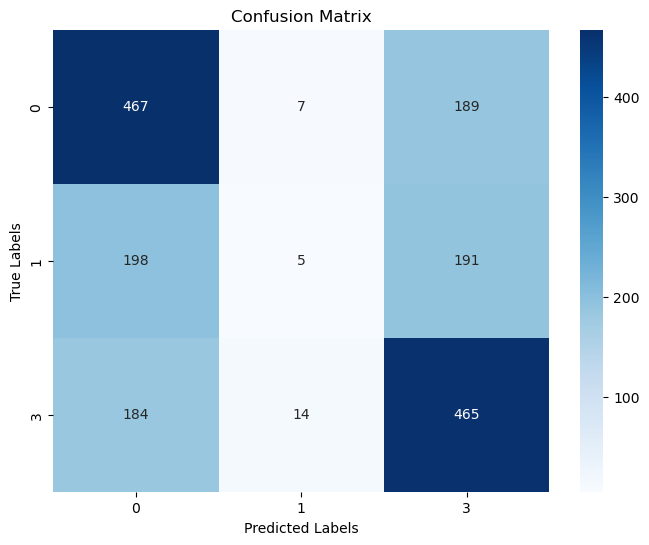

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_set['result'], test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
